In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn
import matplotlib
np.random.seed(1)

In [2]:
def gaussian(x,mu,sig):
    return 1/(np.sqrt(2*np.pi)*sig) * np.exp(-1/2*((x-mu)/sig)**2)

Dist 1: (2,1.5)
Dist 2: (7,0.5)

Dist 3: (8,2.5)
Dist 4: (3.5,1)

In [3]:
x = np.linspace(-10,20,300)
dist1 = np.zeros((300,1))
dist2, dist3, dist4 = np.copy(dist1),np.copy(dist1),np.copy(dist1)

dist1 = gaussian(x,2,1.5)
dist2 = gaussian(x,7,0.5)
dist3 = gaussian(x,8,2.5)
dist4 = gaussian(x,3.5,1)

dist1 = dist1 + dist2
dist2 = dist3 + dist4

The trap z function integrates the y(dist values) along x values

In [4]:
dist1 = dist1/ np.trapz(dist1,x)
dist2 = dist2/ np.trapz(dist2,x)

Plot the distributions

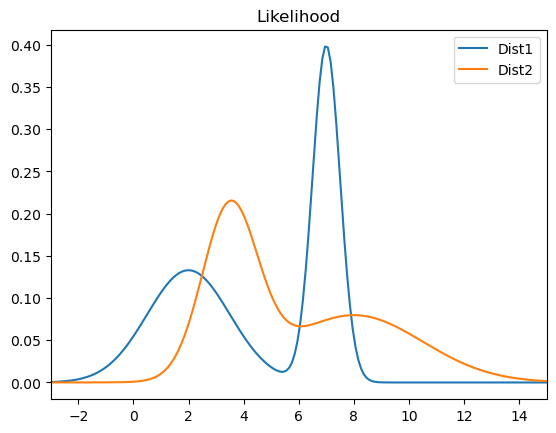

In [5]:
fig, ax = plt.subplots()
plt.plot(x,dist1, label="Dist1")
plt.plot(x,dist2, label="Dist2")
plt.title('Likelihood')
plt.xlim(-3,15)
plt.legend()

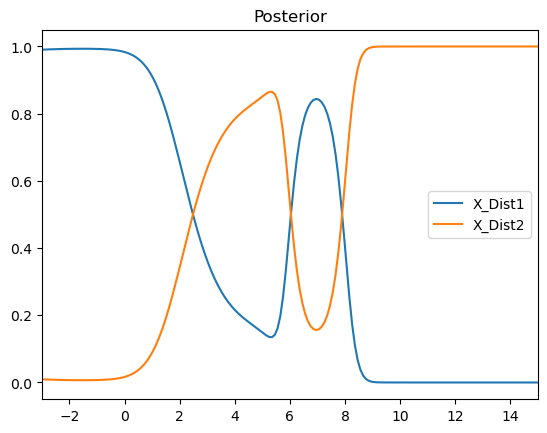

In [6]:
x_p1 = dist1 * 0.5 / (dist1 * 0.5 + dist2 * 0.5)
x_p2 = dist2 * 0.5 / (dist1 * 0.5 + dist2 * 0.5)

fig, ax = plt.subplots()
plt.plot(x,x_p1, label="X_Dist1")
plt.plot(x,x_p2, label="X_Dist2")
plt.title('Posterior')
plt.xlim(-3,15)
plt.legend()

Now change prior and replot

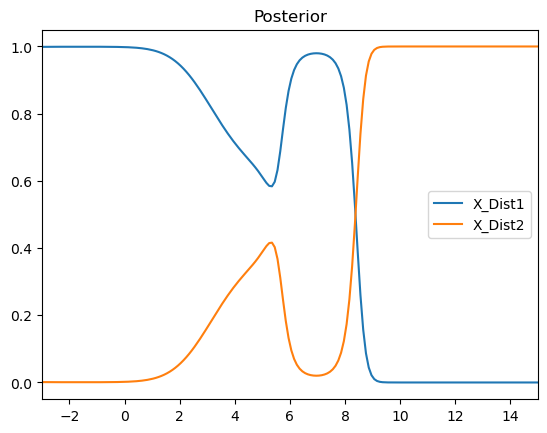

In [7]:
x_p1 = dist1 * 0.9 / (dist1 * 0.9 + dist2 * 0.1)
x_p2 = dist2 * 0.1 / (dist1 * 0.9 + dist2 * 0.1)
plt.plot(x,x_p1, label="X_Dist1")
plt.plot(x,x_p2, label="X_Dist2")
plt.title('Posterior')
plt.xlim(-3,15)
plt.legend()

Classification with Bayes

In [8]:
# Generate datasets with 2 informative features
from sklearn import datasets
X, y = datasets.make_classification(n_samples=1000, n_features=2, n_informative=2,n_redundant=0)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)


Train Classifier

In [10]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)


GaussianNB()

Generate meshgrid to test values

In [11]:
x1 = np.linspace(-3,3,200)
x2 = np.linspace(-3,3,200)
x1grid,x2grid = np.meshgrid(x1,x2)
Xgrid = np.array([x1grid,x2grid]).reshape([2,40000]).T
Xgrid.shape


(40000, 2)

In [12]:
classVals = clf.predict(Xgrid)
classVals = np.reshape(classVals,[200,200])
classVals.shape

(200, 200)

Plot stuff

(-3.5, 3.5)

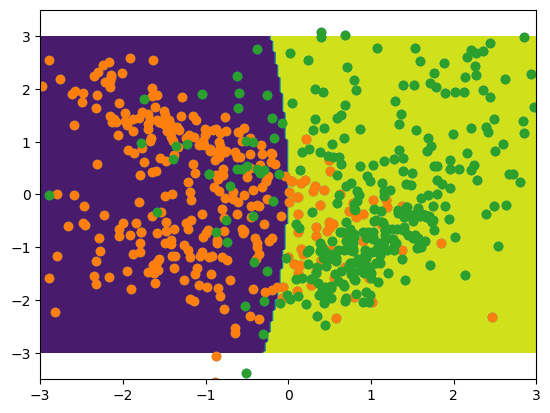

In [13]:
plt.contourf(x1,x2,classVals)
plt.scatter(X_train[:,0],X_train[:,1])

# Plot points that belong to class 0
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1])
# Plot points that belong to class 1
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1])

plt.xlim(-3,3)
plt.ylim(-3.5,3.5)

Check performance

In [14]:
y_test_model = clf.predict(X_test)
nTot = len(y_test)
nMatch=0
for i in range(len(y_test)):
    if y_test[i] == y_test_model[i]:
        nMatch +=1

print(100*nMatch/nTot)

86.66666666666667


In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_test_model)

0.8666666666666667

Plot probability

(-3.0, 3.0)

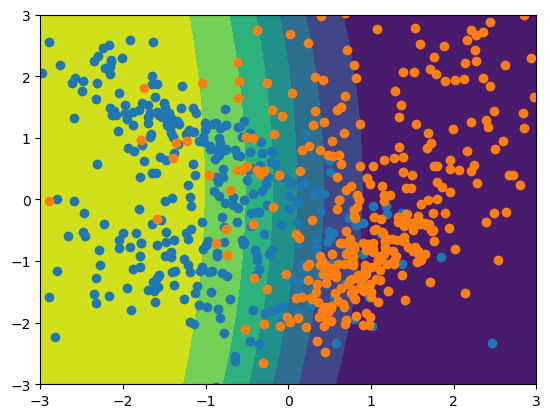

In [19]:
probVals = clf.predict_proba(Xgrid)
probGrid = np.reshape(probVals[:,0],[200,200])

fig, ax = plt.subplots()
plt.contourf(x1,x2,probGrid)

ax.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1])
ax.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1])

r = 3
plt.xlim(-r, r)
plt.ylim(-r, r)